# Data analysis with Pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Loading pandas and our data

In [46]:
# naložimo paket
import pandas as pd 

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# select an interactive "notebook" plot style

# naložimo razpredelnico, s katero bomo delali
films = pd.read_csv('obdelani-podatki/filmi.csv', index_col='id')

Let's take a look at the data.

In [3]:
films

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


## Inspecting the data

Sort the data by rating.

In [4]:
films.sort_values('ocena')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
1213644,Disaster Movie,87,2008,1.9,15.0,80828,14190901.0,"Over the course of one evening, an unsuspectin..."
799949,Velik film,86,2007,2.3,17.0,96182,39739367.0,A comedic satire of films that are large in sc...
185183,Battlefield Earth,118,2000,2.4,9.0,71149,21471685.0,It's the year 3000 A.D.; the Earth is lost to ...
1098327,Dragonball Evolution,85,2009,2.6,45.0,63966,9353573.0,The young warrior Son Goku sets out on a quest...
...,...,...,...,...,...,...,...,...
71562,"Boter, II. del",202,1974,9.0,90.0,950252,57300000.0,The early life and career of Vito Corleone in ...
468569,Vitez teme,152,2008,9.0,84.0,1972591,534858444.0,When the menace known as the Joker emerges fro...
68646,Boter,175,1972,9.2,100.0,1372528,134966411.0,The aging patriarch of an organized crime dyna...


Extract the 'ocena' column.

In [12]:
rating = films['ocena']
rating

id
12349      8.3
13442      8.0
15864      8.2
17136      8.3
17925      8.2
          ... 
5813916    9.4
5988370    1.8
6294822    7.2
6644200    7.7
7784604    7.3
Name: ocena, Length: 2500, dtype: float64

There is a difference between `filmi['ocena']` and `filmi[['ocena']]`:

In [11]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


The columns of dataframes are `Series`. Using single brackets extracts a `Series` (think: a vector, no further structure), double brackets extracts a sub-`DataFrame`. Most of the operations we perform (grouping, joining, plotting, filtering, ...) operate on dataframes. 

A `Series` is used for example if we want to add a column to a dataframe.

Round the extracted rating series to the nearest integer using the `round()` function.

In [14]:
rating.round()

id
12349      8.0
13442      8.0
15864      8.0
17136      8.0
17925      8.0
          ... 
5813916    9.0
5988370    2.0
6294822    7.0
6644200    8.0
7784604    7.0
Name: ocena, Length: 2500, dtype: float64

Add the rounded value to the filmi dataframe.

In [15]:
films['rounded'] = rating.round().values
films

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,rounded
id,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",8.0
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...,8.0
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,8.0
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...,8.0
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,8.0
...,...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...,9.0
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...,2.0
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...,7.0


Remove the newly added column using the `.drop()` method with a `columns = ` argument.

In [25]:
films.drop(['rounded'], axis = 1, inplace = True) 
films

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


### Side-note: slices
Selecting a sub-dataframe creates a "slice".
A slice is a view defined by reference to a different dataframe,
and cannot be altered directly. Instead, we have to create a copy of the portion selected by the slice by calling the `.copy()` method on that slice, and can then alter that copy.


Select the slice corresponding to the columns `naslov`, `leto`, and `glasovi` from `filmi`, and add a column with the rounded rating to it.

### Filtering data

Create a filter that selects films from before 1930, and one for films from after 2017.
Combine them to select films from before 1930 or after 2017.

In [31]:
films[(films.leto < 1930) | (films.leto > 2017) ]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5164214,Oceanovih 8,110,2018,6.3,61.0,91163,139377762.0,Debbie Ocean gathers an all-female crew to att...
5164432,"Z ljubeznijo, Simon",110,2018,7.7,72.0,62350,40826341.0,Simon Spier keeps a huge secret from his famil...
5463162,Deadpool 2,119,2018,7.9,66.0,279452,318490305.0,Foul-mouthed mutant mercenary Wade Wilson (AKA...


Define a function that splits a string into words and tests if the number of words is at most two, then select the films with a name no longer than two words and a rating greater than 8.

Hint: Use the `.apply()` method to create a filter from the `naslov` column.

In [47]:
import re
def word_count(line):
    regex = r'\bw+\b'
    if len(re.findall(regex, line)) <= 2:
        return True 
    else: 
        return False 

films['naslov'].apply(word_count) 


id
12349      True
13442      True
15864      True
17136      True
17925      True
           ... 
5813916    True
5988370    True
6294822    True
6644200    True
7784604    True
Name: naslov, Length: 2500, dtype: bool

### Histograms: Counting frequencies of values

Group the films by rating, then number of occurances of each rating.

In [48]:
films.groupby('ocena').size()

ocena
1.8    1
1.9    1
2.3    1
2.4    1
2.6    1
      ..
8.9    5
9.0    2
9.2    1
9.3    1
9.4    1
Length: 61, dtype: int64

Create a bar plot of this data.

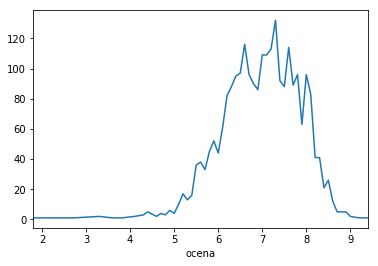

In [50]:
%matplotlib inline
films.groupby('ocena').size().plot()

Dataframes have a built-in `.hist()` method that allows creating histograms for each column. Use this method to create a corresponding plot for the simplified data.

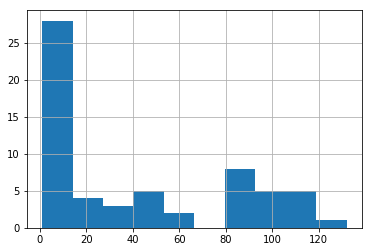

In [51]:
films.groupby('ocena').size().hist()

### Plot the average film length by year

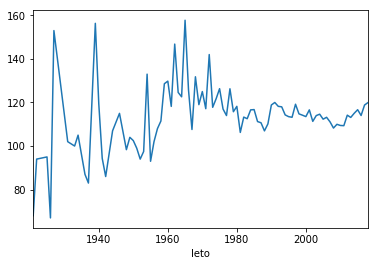

In [53]:
films.groupby('leto').dolzina.mean().plot()

### Plot the sum of the revenues by year

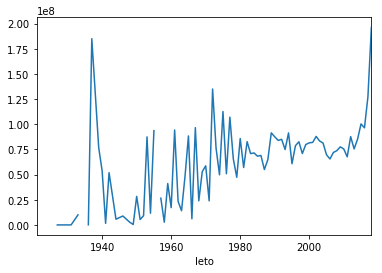

In [55]:
films.groupby('leto').zasluzek.mean().plot()